In [94]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("Experiment3_recommendations.csv")
abtest = pd.read_csv("Yield Optimizer Experiment 3.csv", skiprows=10)

In [96]:
abtest.dropna(inplace=True)
df.dropna(inplace=True)
display(abtest.shape)
display(df.shape)

(1012, 8)

(36, 20)

In [99]:
abtest[["ad0", "ad1", "ad2", "ad3", "ad4", "ad5"]] = abtest["DFP Ad Units"].str.split(" » ", n=6, expand=True)
abtest.drop(columns=["DFP Ad Units", "ad0", "ad3", "Clicks"], inplace=True)

In [100]:
abtest[['Countries', 'ad1', "ad2", "ad4", "ad5"]] = abtest[['Countries', 'ad1', "ad2", "ad4", "ad5"]].apply(lambda x: x.str.lower())

In [101]:
abtest.replace(',','', regex=True, inplace=True)

In [102]:
abtest[["Ad requests", "Estimated revenue (€)", "Ad impressions"]] = abtest[["Ad requests", "Estimated revenue (€)", "Ad impressions"]].astype("float64")

In [103]:
abtest["Date"] = abtest["Date"].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))

In [104]:
abtest["Date"] = abtest["Date"].astype(str)

In [105]:
abtest.rename(columns={"Date": "date", "Countries": "country", "Estimated revenue (€)": "revenue"}, inplace=True)

In [106]:
display(abtest.head(5))
display(df.head(5))

,Channels,country,date,Ad requests,revenue,Ad impressions,ad1,ad2,ad4,ad5
0,ab_upr1,japan,2021-09-17,116.0,0.09,55.0,desktop,desktop-web-en,download,atf_mpu_first
1,ab_upr1,japan,2021-09-18,134.0,0.13,71.0,desktop,desktop-web-en,download,atf_mpu_first
2,ab_upr1,japan,2021-09-19,118.0,0.11,64.0,desktop,desktop-web-en,download,atf_mpu_first
3,ab_upr1,japan,2021-09-20,89.0,0.08,52.0,desktop,desktop-web-en,download,atf_mpu_first
4,ab_upr1,japan,2021-09-21,102.0,0.09,50.0,desktop,desktop-web-en,download,atf_mpu_first


,date,country,ad1,businessUnit,ad4,ad5,cluster,mean,stdv,skewness,kurtosis,rpmSlopeZScore,potentialRevenueSum,potentialRevenueZScore,percentDifferenceAvg,percentDifference,percentDifferenceZScore,priorityScore,UPR,potentialRevenueLoss
0,2021-09-17,japan,desktop,softonic.com,programpage,atf_mpu_first,3,0.963492,2.935769,64.130239,8801.661006,-0.949020,728.132502,2.496939,0.274671,0.396039,0.324610,1.456490,1.015739,0.233073
1,2021-09-17,japan,desktop,softonic.com,download,atf_mpu_first,0,1.062648,2.193987,15.114852,598.980283,-1.041645,449.530014,2.200781,0.274671,0.379985,0.287901,1.215939,1.174856,0.242095
2,2021-09-17,spain,desktop,softonic.com,download,atf_mpu_first,0,0.653224,1.602670,13.931456,488.519814,-0.648537,251.913520,1.845170,0.274671,0.382291,0.293269,1.111691,0.592398,0.233140
3,2021-09-17,spain,desktop,softonic.com,programpage,atf_mpu_first,0,0.566000,1.205008,6.412711,72.873622,-0.679305,174.280368,1.618944,0.274671,0.292232,0.054977,0.871187,0.547692,0.229523
4,2021-09-18,japan,desktop,softonic.com,programpage,atf_mpu_first,3,0.985374,2.971466,73.497447,11502.777840,-0.931798,757.371168,2.515533,0.277887,0.413553,0.352545,1.483937,1.075752,0.235491


In [107]:
analysis = df.merge(abtest, how="inner", on=["date", "country", "ad1", "ad4", "ad5"], validate = "one_to_many")

In [109]:
drop_columns = ["potentialRevenueSum", "percentDifferenceAvg", "cluster", "mean", "stdv", "skewness", "kurtosis", "rpmSlopeZScore", "potentialRevenueZScore", "percentDifference", "percentDifferenceZScore", "priorityScore", "UPR", "potentialRevenueLoss"]
time = analysis.drop(columns=drop_columns)
time = time.groupby(by=["date", "country", "ad1", "ad4", "ad5"]).sum().reset_index()
time["RPM"] = 1000*time["revenue"]/time["Ad requests"]
before = time[time["date"]==time["date"].min()]["RPM"].reset_index(drop=True) 
after = time[time["date"]==time["date"].max()]["RPM"].reset_index(drop=True)
time2 = time.groupby(by=["country", "ad1", "ad4", "ad5"]).sum().reset_index().drop(columns="RPM")
time2["before"] = before
time2["after"] = after
time2["% RPM Before-After Change"] = ((after-before)/before) * 100
time2

,country,ad1,ad4,ad5,Ad requests,revenue,Ad impressions,before,after,% RPM Before-After Change
0,japan,desktop,download,atf_mpu_first,353553.0,761.58,147638.0,1.013817,4.483081,342.198259
1,japan,desktop,programpage,atf_mpu_first,542706.0,820.62,205388.0,0.864221,3.451479,299.374415
2,spain,desktop,download,atf_mpu_first,348054.0,235.59,133824.0,0.493285,1.154562,134.055917
3,spain,desktop,programpage,atf_mpu_first,241149.0,151.87,88104.0,0.520771,0.802325,54.064685


In [110]:
drop_columns = ["potentialRevenueSum", "percentDifferenceAvg", "cluster", "mean", "stdv", "skewness", "kurtosis", "rpmSlopeZScore", "potentialRevenueZScore", "percentDifference", "percentDifferenceZScore", "priorityScore", "UPR", "potentialRevenueLoss"]
analysis = analysis.drop(columns=drop_columns)
replace_values = {'ab_upr1': "control", 'ab_upr2': "control", 'ab_upr3': "control", 'ab_upr4': "control", 'ab_upr5': "control",'ab_upr6': "test", 'ab_upr7': "test", 'ab_upr8': "test", 'ab_upr9': "test", 'ab_upr10': "test"}
analysis = analysis.replace({"Channels": replace_values})
analysis = analysis.groupby(by=["date", "country", "ad1", "ad4", "ad5", "Channels"]).sum().reset_index()
analysis["RPM"] = 1000*analysis["revenue"]/analysis["Ad requests"]
analysis.head(10)

,date,country,ad1,ad4,ad5,Channels,Ad requests,revenue,Ad impressions,RPM
0,2021-09-17,japan,desktop,download,atf_mpu_first,control,29021.0,29.25,9947.0,1.007891
1,2021-09-17,japan,desktop,download,atf_mpu_first,test,29747.0,30.33,10558.0,1.019599
2,2021-09-17,japan,desktop,programpage,atf_mpu_first,control,51509.0,44.15,16931.0,0.857132
3,2021-09-17,japan,desktop,programpage,atf_mpu_first,test,51821.0,45.15,17736.0,0.871268
4,2021-09-17,spain,desktop,download,atf_mpu_first,control,23872.0,11.38,6380.0,0.476709
5,2021-09-17,spain,desktop,download,atf_mpu_first,test,23707.0,12.09,7408.0,0.509976
6,2021-09-17,spain,desktop,programpage,atf_mpu_first,control,15986.0,7.66,4037.0,0.479169
7,2021-09-17,spain,desktop,programpage,atf_mpu_first,test,16005.0,9.00,5592.0,0.562324
8,2021-09-18,japan,desktop,download,atf_mpu_first,control,28234.0,31.12,8994.0,1.102217
9,2021-09-18,japan,desktop,download,atf_mpu_first,test,29020.0,32.54,10299.0,1.121296


In [111]:
drop_columns = ["RPM"]
analysis1 = analysis.drop(columns=drop_columns)
analysis1= analysis1.groupby(by=["country", "ad1", "ad4", "ad5", "Channels"]).sum().reset_index()
analysis1["RPM"] = 1000*analysis1["revenue"]/analysis1["Ad requests"]
analysis1.head(10)

,country,ad1,ad4,ad5,Channels,Ad requests,revenue,Ad impressions,RPM
0,japan,desktop,download,atf_mpu_first,control,176457.0,372.95,71294.0,2.113546
1,japan,desktop,download,atf_mpu_first,test,177096.0,388.63,76344.0,2.194460
2,japan,desktop,programpage,atf_mpu_first,control,270411.0,398.53,98819.0,1.473794
3,japan,desktop,programpage,atf_mpu_first,test,272295.0,422.09,106569.0,1.550120
4,spain,desktop,download,atf_mpu_first,control,173434.0,115.29,64554.0,0.664749
5,spain,desktop,download,atf_mpu_first,test,174620.0,120.30,69270.0,0.688925
6,spain,desktop,programpage,atf_mpu_first,control,119888.0,70.93,36955.0,0.591636
7,spain,desktop,programpage,atf_mpu_first,test,121261.0,80.94,51149.0,0.667486


In [112]:
drop_columns = ["Ad requests", "revenue", "Ad impressions", "RPM"]
analysis2 = analysis1.groupby(by=["country", "ad1", "ad4", "ad5"]).mean().reset_index().drop(columns=drop_columns)
test = analysis1[analysis1["Channels"]=="test"]["RPM"].reset_index(drop=True) 
control = analysis1[analysis1["Channels"]=="control"]["RPM"].reset_index(drop=True)
analysis2["% RPM Change"] = ((test-control)/control) * 100
analysis2

,country,ad1,ad4,ad5,% RPM Change
0,japan,desktop,download,atf_mpu_first,3.828326
1,japan,desktop,programpage,atf_mpu_first,5.178926
2,spain,desktop,download,atf_mpu_first,3.636860
3,spain,desktop,programpage,atf_mpu_first,12.820445


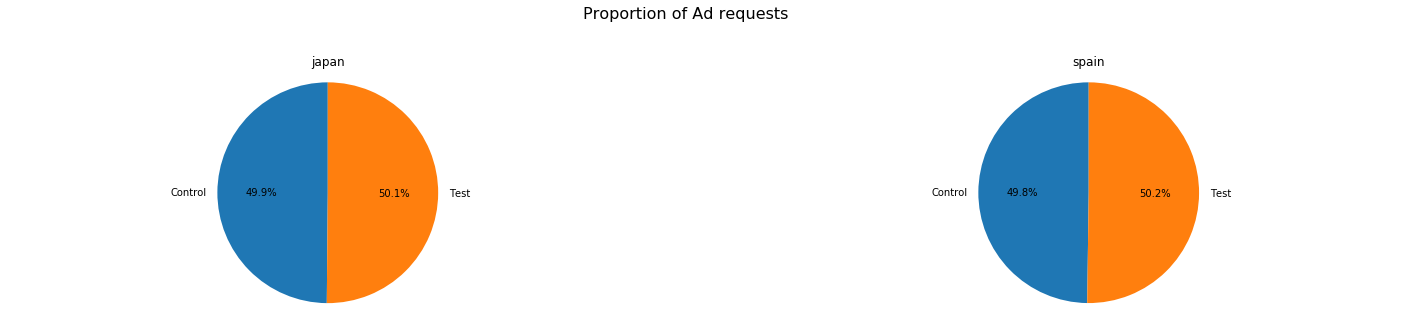

In [113]:
countries = analysis1["country"].unique()
for i in range(0, len(countries)):
  locals()[countries[i]] = [analysis1.loc[(analysis1["country"]==countries[i])&(analysis1["Channels"]=="control")]["Ad requests"].sum(), analysis1.loc[(analysis1["country"]==countries[i])&(analysis1["Channels"]=="test")]["Ad requests"].sum()]
labels = ["Control", "Test"]
graphs = countries.copy()
fig, graphs = plt.subplots(1, len(countries), figsize=(25, 5))
for i in range(0, len(countries)):
  graphs[i].pie(locals()[countries[i]], labels=labels, autopct='%.1f%%', startangle=90)
  graphs[i].axis('equal')
  graphs[i].title.set_text(countries[i])
fig.suptitle("Proportion of Ad requests", fontsize=16)
fig.subplots_adjust(top=0.8)
plt.show()

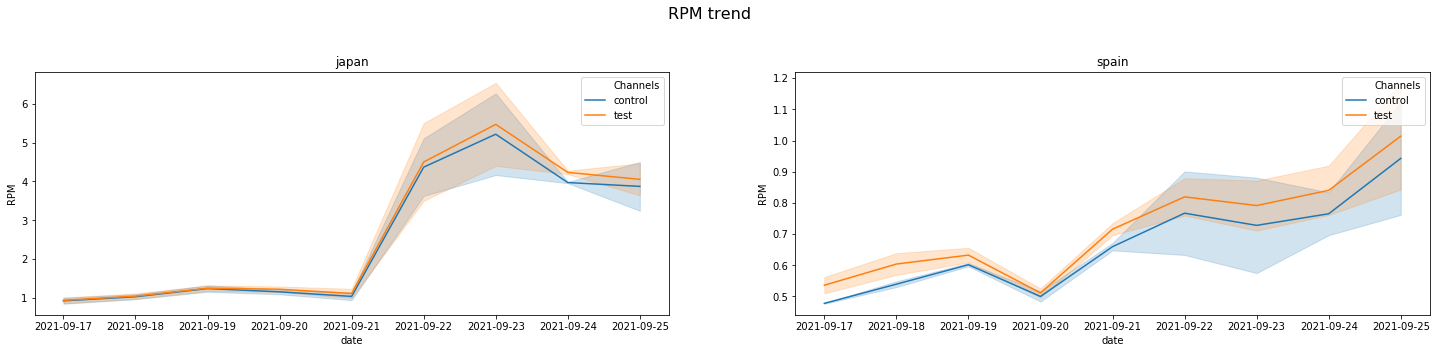

In [114]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)
fig, graphs = plt.subplots(1, len(countries), figsize=(25, 5))
for i in range(0, len(countries)):
  graphs[i]= sns.lineplot(x="date", y="RPM", hue="Channels", data=analysis[analysis["country"]==countries[i]], ax=graphs[i])
  graphs[i].title.set_text(countries[i])
fig.suptitle("RPM trend", fontsize=16)
fig.subplots_adjust(top=0.8)

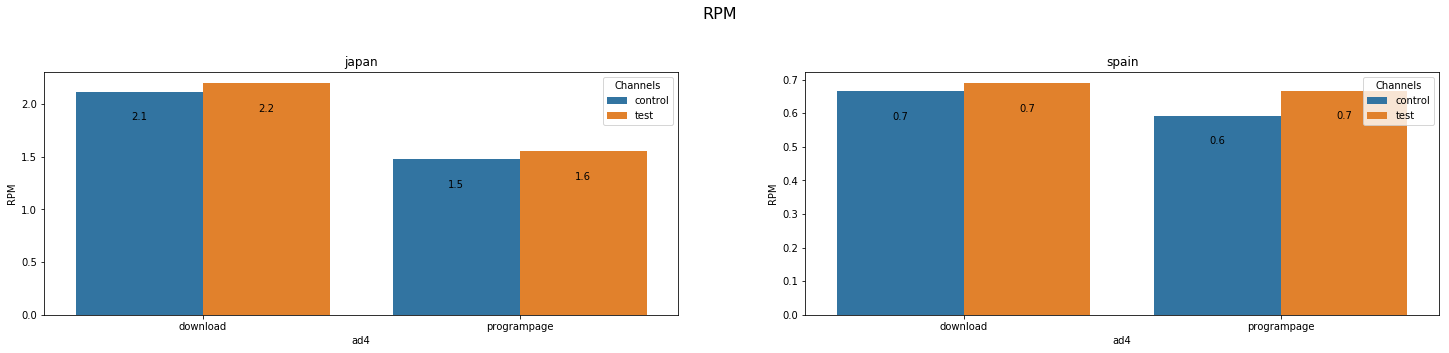

In [115]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)
fig, graphs = plt.subplots(1, len(countries), figsize=(25, 5))
for i in range(0, len(countries)):
  graphs[i] = sns.barplot(x="ad4", y="RPM", hue="Channels", data=analysis1[analysis1["country"]==countries[i]], ax=graphs[i])
  for p in graphs[i].patches:
    graphs[i].annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, -25), textcoords='offset points')
  graphs[i].title.set_text(countries[i])
fig.suptitle("RPM", fontsize=16)
fig.subplots_adjust(top=0.8)

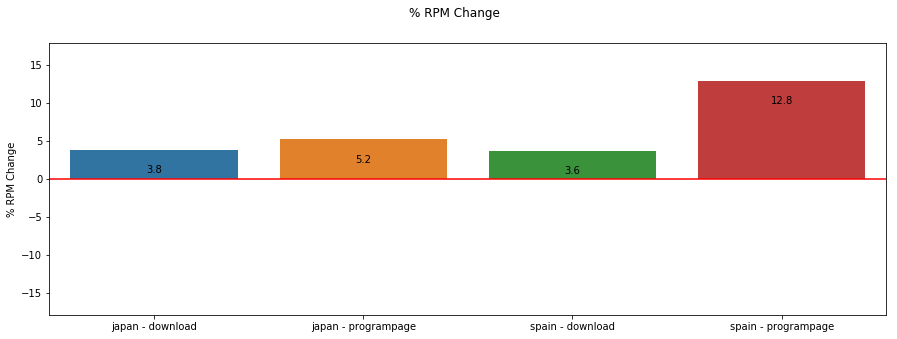

In [116]:
fig, (ax1) = plt.subplots(figsize=(15, 5))
ax1 = sns.barplot(x=analysis2.index, y=analysis2["% RPM Change"], ax=ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, -20), textcoords='offset points')
fig.suptitle("% RPM Change")
plt.xticks(range(len(analysis2)), [x +" - "+ y for x, y in zip(analysis2["country"], analysis2["ad4"])])
ylim = max(analysis2["% RPM Change between Control & Test"])
plt.ylim(-ylim-5, ylim+5)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

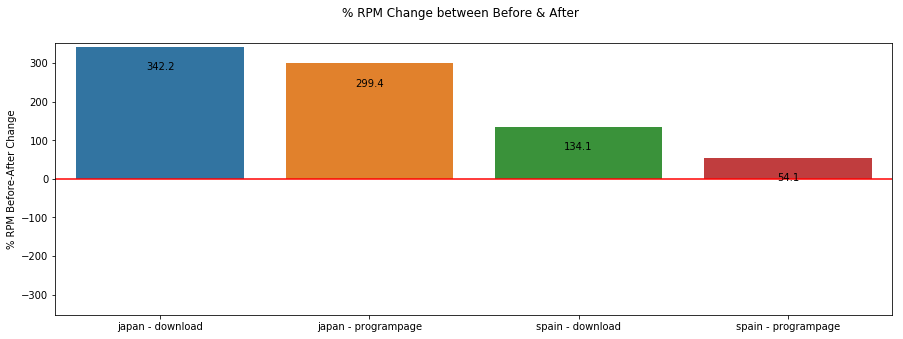

In [117]:
fig, (ax1) = plt.subplots(figsize=(15, 5))
ax1 = sns.barplot(x=time2.index, y=time2["% RPM Before-After Change"], ax=ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, -20), textcoords='offset points')
fig.suptitle("% RPM Change between Before & After")
plt.xticks(range(len(time2)), [x +" - "+ y for x, y in zip(time2["country"], time2["ad4"])])
ylim = max(time2["% RPM Before-After Change"])
plt.ylim(-ylim-10, ylim+10)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()